# Theory and Intuition
First Hyperplanes and margins are discussed and incremental complexity in classifiers is shown, finally ending at Support Vector Machines

* Maximum Margin Classifier
* Support Vector Classifier 
* Support Vector Machines

## Hyperplanes And Margins
Understanding hyperplanes and margin classifiers in fundamental to understanding SVM

### What is Hyperplane?
In a N-dimensional space, a hyperplane is a flat affine subspace of hyperplane dimension N-1. For ex:

* For 1-D, Hyperplane is a single point
* For 2-D, Hyperplane is a line and so on

### Why we bother with hyperplanes?
The main idea is to use hyperplane to create separation between classes (fancy way of saying different types of data points). Our hope is such a hyperplane exists which can bifurcate differencing points in the space

### Baby Chick Example
1-D dataset of baby chicks (male or female) is plotted on a line in @fig:max_margin, with male on RHS and female on LHS. Visually, data is easily separable.

I this dataset, a single point in the middle of dataset can easily separate both datasets, but issue is **placing of the point** 

**Where to Place the Point?**  

![Maximum Margin Classifer](img\max-margin.png){#fig:max_margin}

Same example can be applied in 2-D space, where classes are separated by line, but there are $\inf$ lines which can separate. Again, we use maximise the margin (distance) between line and data points (each data point 2D vector here)

### Unseparable Classes?
NOt all classes will be easily separable (at least visually) showin in Fig. A single point will mess up at least one class, so we need to chose our poison. Our decision is guided by Bias-Variance Tradeoff

**Bias Variance Tradeoff**
Example @fig:unbalanced_margin and @fig:skewed_margin_2d show how one can overfit hard to one particular dataset (however no. of point misclassified is same i.e. 1 in both cases). But it is obvious our maximum margin classifier skews heavily female in @fig:unbalanced_margin and in @fig:skewed_margin_2d. This can bite us in ass when we decide to test or deploy the model

![Variance Fit to Unbalanced Data](img\soft-margin=classifer1.PNG){#fig:unbalanced_margin}

This is called **high variance fit**. In example @fig:unbalanced_margin, it was "picking too much noise from female data" and thus, overfitting it or had a high variance w.r.t female data points. We can introduce **bias** for more logical classifier, even at the cost of training accuracy. This misclassification doing margin is called a *_soft margin_*, which allows for miscallsification within itself. We manipulate soft margin with introduction of bias. 

**But again, there are multiple threshold splits of soft margin, and **Maximum Margin** concept is already applied, so what else we can do to get optimum *soft margin*.**
The answer lies in level of misclassification to be allowed. With *misclassification* as our north-star, we perform *Cross Validation* to figure out best *soft margin* amongst all.

### Soft Margin Demonstraion
Maximum margin classifer in this example skews heavily female, due to picking "too much variance or too much noie" from the female set. The highlighted figure @fig:skewed_margin_2d shows Male classification zone is too larger than what seems necessary, and it can cause problems in test set. So, there is need to soften the margin we got from *Maximum Margin Classifer*

![Skewed Max. Margin Classifier 2D](img\skewed-soft-margin-2d.png){#fig:skewed_margin_2d}

So we introduce a new classifier, that allows for *soft margins*, called a *Support Vector Classifier*

**What happens when Hyperplane theory falls on it face?**
Cases @fig:bad-hyperplane-1d and @fig:bad-hyperplane-2d demonstrate the respective hyperplanes (point and lines resp.) fail here. Using multiple points can solve the issue in @fig:bad-hyperplane-1d, but in @fig:bad-hyperplane-2d, group of lines is not gonna help much

![Poor Classification with Hyperplane](img\poor-hyperplane-classification-1d.PNG){#fig:bad-hyperplane-1d}

![Poor Classification with Hyperplane](img\poor-hyperplane-classification-2d.PNG){#fig:bad-hyperplane-2d}

> In general, higher dimesions make it difficult to use multiple hyperplanes*

And that's the limitation of *Support Vector Classifier* and rationale to move on to *Suppport Vector Machines*

## Kernels
We will move beyond maximum margin classifier or support vector classifier using soft margin to *support vector machines*.  
It is kernel operation which works by projecting features to higher dimension. Revisiting example in +@fig:bad-hyperplane-1d, where hyperplane classifers (maximum and soft) fail.  
We project all the features and project them in different dimension (like polynomial projection in +@fig:poly_projection). Here, features are projected in $X^2$ dimensino and a classifier is added to classify it.  

For +@fig:bad-hyperplane-2d, we project 2D space in 3D as shown in +@fig:3d_projection, and use classifier.

![Projecting 1-D features to $X^2$ space](img\polynomial_projection.PNG){#fig:poly_projection}

## Kernel Trick & Mathematics
The above example is not actually a kernel trick, since it is expensive to tranform everything into higher dimensional space. We use dot products for this projection which is computationally less expensive

![Projecting 2D space to 3D](img\3d_projection.PNG){#fig:3d_projection}  

Reading reference: Chapter 9 ISLR
Paper: Cortnes (1995)

### Hyperplanes Defined

For a feature space defined by two features $x1$ and $x2$, a hyperplane is defined as:

$$\beta_0 + \beta_1X_1 + \beta_2X_2 = 0 \tag{1}$${#eq:2D_hyperplane}

For feature set of $p$ dimension, $X = \{X_1,X_2,\dots,X_p\}$, a hyperplane is defined as:
$$\beta_0 + \beta_1X_1 + \beta_2X_2 + \dots + \beta_pX_p = 0 \tag{2}$${#eq:pD_hyperplane}

**Separating Hyperplanes**  
So far, we have defined hyperplanes and what they are. But in context of SVM, the idea is hyperplanes *seaparate* the classes. Now we try to define the criteria for this separation

Refer to mathematical details in 9.3.2 ISLR

# SVM Classification

Using Scikit learn code to solve classification problem

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
%matplotlib notebook 

In [3]:
import numpy as np 

A study is used where a mouse if fed medicine, and check whether he is still infected or not

In [4]:
df = pd.read_csv('../DATA/mouse_viral_study.csv')
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


<IPython.core.display.Javascript object>


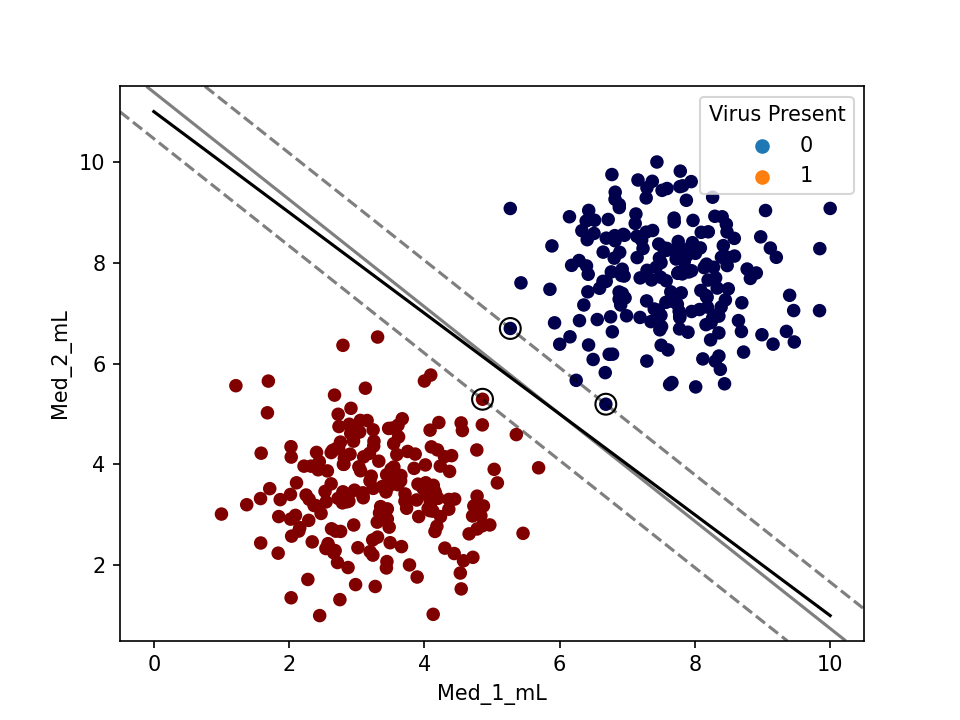

<AxesSubplot:xlabel='Med_1_mL', ylabel='Med_2_mL'>

In [10]:
sns.scatterplot(x = 'Med_1_mL',y = 'Med_2_mL',hue = 'Virus Present',
               data = df) 

## Create a hyperplane 

In [7]:
plt.show()

In [11]:
x = np.linspace(0,10,100)
m = -1 
b = 11
y = m*x + b
plt.plot(x,y,'black')

Here, we plot a line on intuition. But how to get mathemetically optimised classifer?

In [12]:
from sklearn.svm import SVC

In [14]:
#SVC?

In [15]:
y = df['Virus Present']
X = df.drop('Virus Present',axis = 1)

In [16]:
model = SVC(kernel = 'linear',C = 1000)
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [17]:
from svm_margin_plot import plot_svm_boundary

<IPython.core.display.Javascript object>


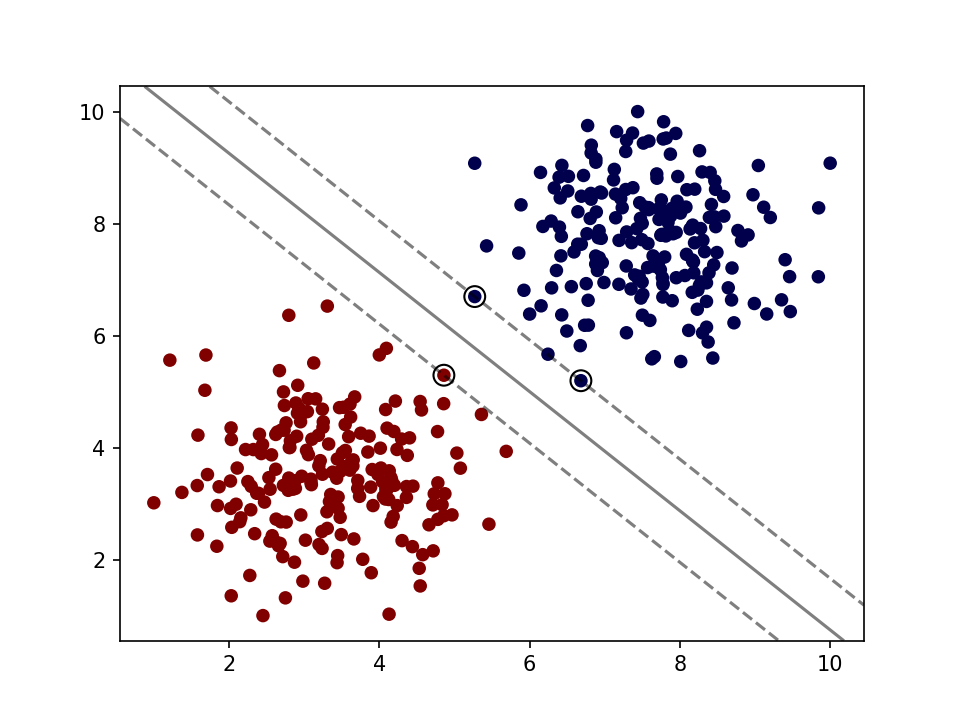

In [19]:
plt.figure()
plot_svm_boundary(model,X,y)

Next, we will use a small C, which will allow lot of misclassification

<IPython.core.display.Javascript object>


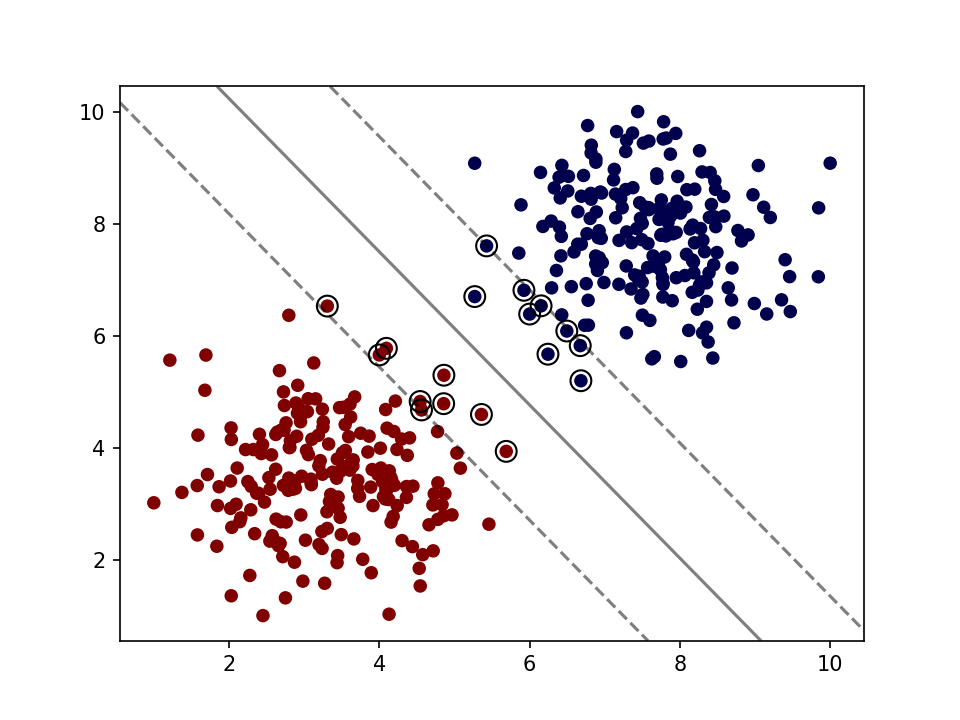

In [20]:
model = SVC(kernel = 'linear',C = 0.05)
model.fit(X,y)
plt.figure()
plot_svm_boundary(model,X,y)

`C` is heavily depdent on data, so we will need to do some cross-validation search to find optimal `C`

## RBF Kernel

<IPython.core.display.Javascript object>


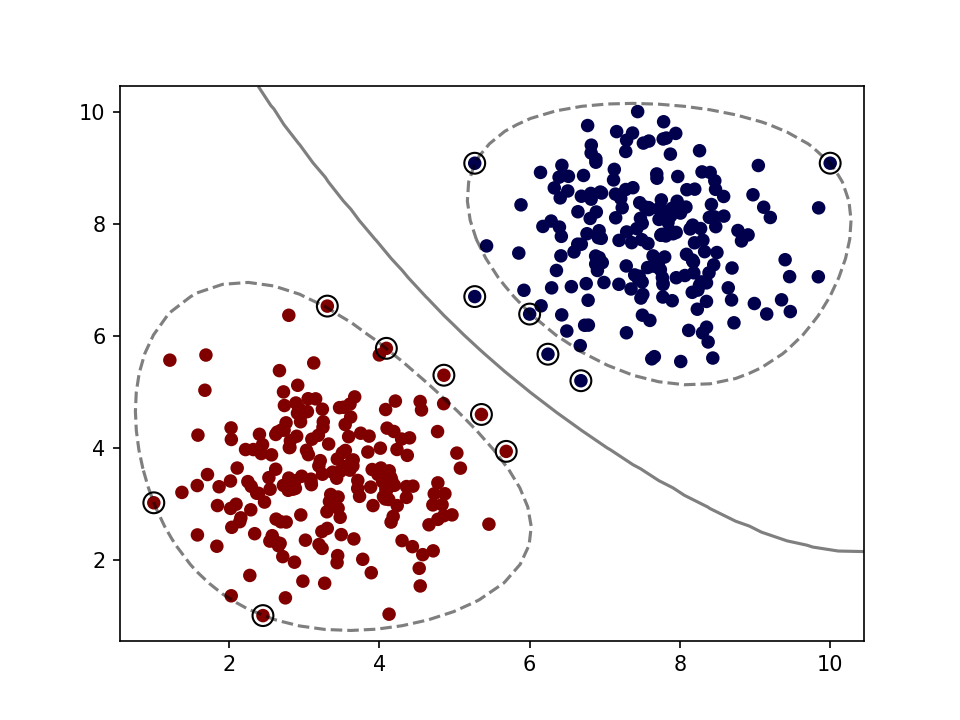

In [21]:
model = SVC(kernel = 'rbf',C=1)
model.fit(X,y)
plt.figure()
plot_svm_boundary(model,X,y)